In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
import math
import numpy as np
from scipy import stats
%matplotlib inline
from pylab import *
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
from scipy.stats import pearsonr

import xlrd

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set(style="darkgrid")

In [10]:
data_edit = pd.read_csv('data_edit.csv')
data = data_edit.drop(['year'], axis=1)
data.describe()

,elder_proportion,GDP,median_income,population_density,unemployment_rate,healthcare_expenditure
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,16.710662,41183.805127,22416.666667,5063.705556,7.478234,1901.545033
std,0.847603,7219.069913,3786.392043,351.200431,1.249422,582.423245
min,15.893148,29894.792000,16600.000000,4603.100000,5.395928,946.524803
25%,16.017371,35521.290113,19025.000000,4741.500000,6.916918,1465.219006
50%,16.313978,42136.921055,22550.000000,5010.600000,7.129153,1860.586830
75%,17.348935,45683.524390,25350.000000,5344.175000,8.499136,2432.150343
max,18.291135,53388.095930,28800.000000,5663.600000,9.878602,2618.696884


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

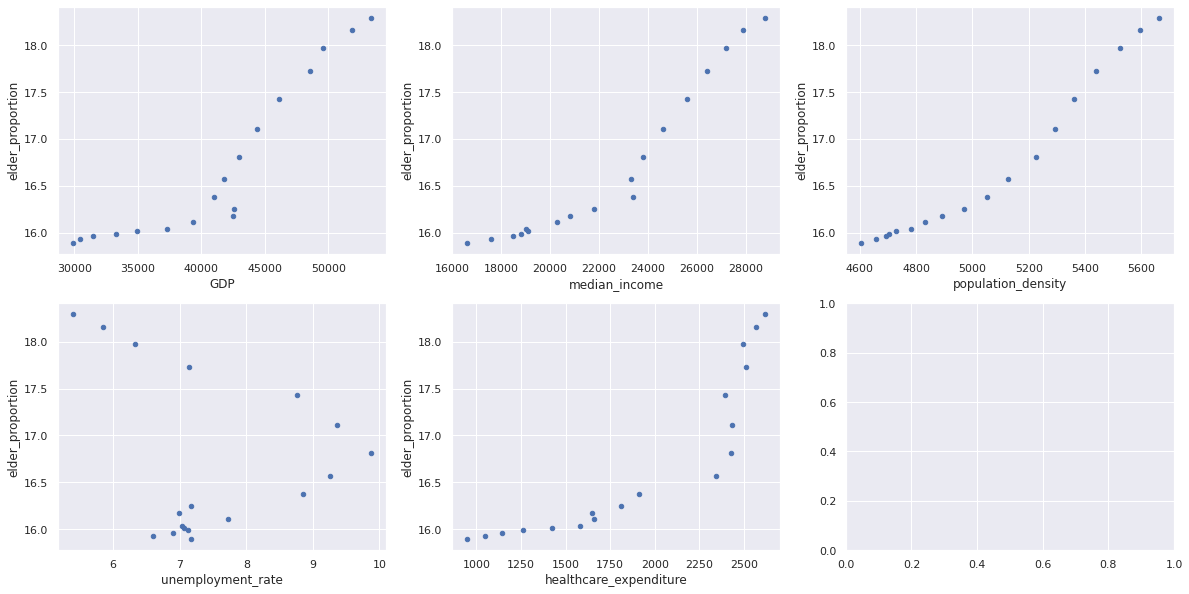

In [22]:
fig, ax = plt.subplots(2,3)
data_edit.plot(kind="scatter",x="GDP",y="elder_proportion", ax=ax[0,0])
data_edit.plot(kind="scatter",x="median_income",y="elder_proportion", ax=ax[0,1])
data_edit.plot(kind="scatter",x="population_density",y="elder_proportion", ax=ax[0,2])
data_edit.plot(kind="scatter",x="unemployment_rate",y="elder_proportion", ax=ax[1,0])
data_edit.plot(kind="scatter",x="healthcare_expenditure",y="elder_proportion", ax=ax[1,1])
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.savefig('scatter_plots.png', dpi = 600)

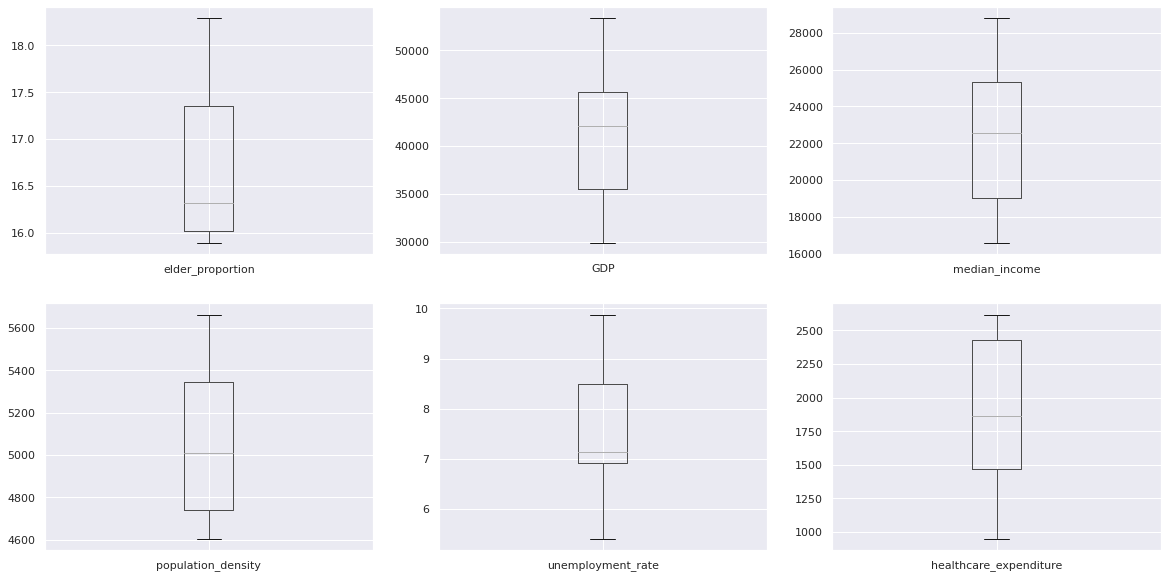

In [23]:
plt.subplot(2,3,1)
data_edit.boxplot(column=['elder_proportion'])
plt.subplot(2,3,2)
data_edit.boxplot(column=['GDP'])
plt.subplot(2,3,3)
data_edit.boxplot(column=['median_income'])
plt.subplot(2,3,4)
data_edit.boxplot(column=['population_density'])
plt.subplot(2,3,5)
data_edit.boxplot(column=['unemployment_rate'])
plt.subplot(2,3,6)
data_edit.boxplot(column=['healthcare_expenditure'])
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.savefig('box_plots.png', dpi = 600)

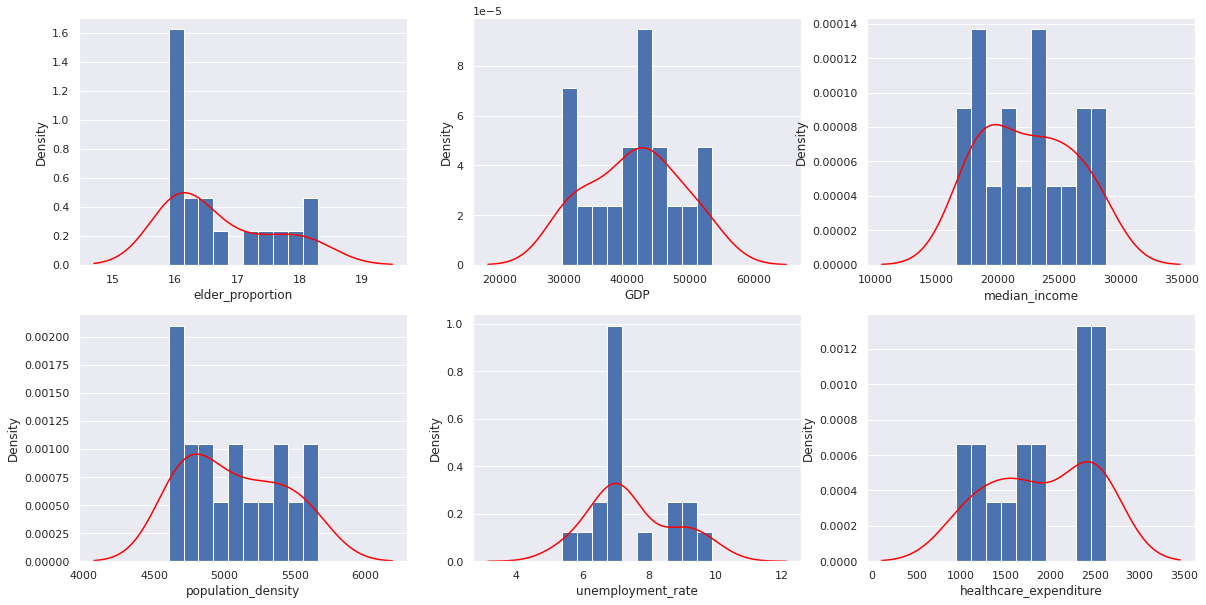

In [16]:
fig, ax = plt.subplots(2,3)
data_edit.elder_proportion.plot(kind = 'kde', color = 'red', ax=ax[0,0])
data_edit.elder_proportion.plot(kind = 'hist', density = True, ax=ax[0,0])
ax[0,0].set_ylabel('Density')
ax[0,0].set_xlabel('elder_proportion')
ax[0,0].grid(axis='x')
data_edit.GDP.plot(kind = 'kde', color = 'red', ax=ax[0,1])
data_edit.GDP.plot(kind = 'hist', density = True, ax=ax[0,1])
ax[0,1].set_ylabel('Density')
ax[0,1].set_xlabel('GDP')
ax[0,1].grid(axis='x')
data_edit.median_income.plot(kind = 'kde', color = 'red', ax=ax[0,2])
data_edit.median_income.plot(kind = 'hist', density = True, ax=ax[0,2])
ax[0,2].set_ylabel('Density')
ax[0,2].set_xlabel('median_income')
ax[0,2].grid(axis='x')
data_edit.population_density.plot(kind = 'kde', color = 'red', ax=ax[1,0])
data_edit.population_density.plot(kind = 'hist', density = True, ax=ax[1,0])
ax[1,0].set_ylabel('Density')
ax[1,0].set_xlabel('population_density')
ax[1,0].grid(axis='x')
data_edit.unemployment_rate.plot(kind = 'kde', color = 'red', ax=ax[1,1])
data_edit.unemployment_rate.plot(kind = 'hist', density = True, ax=ax[1,1])
ax[1,1].set_ylabel('Density')
ax[1,1].set_xlabel('unemployment_rate')
ax[1,1].grid(axis='x')
data_edit.healthcare_expenditure.plot(kind = 'kde', color = 'red', ax=ax[1,2])
data_edit.healthcare_expenditure.plot(kind = 'hist', density = True, ax=ax[1,2])
ax[1,2].set_ylabel('Density')
ax[1,2].set_xlabel('healthcare_expenditure')
ax[1,2].grid(axis='x')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.savefig('histogram.png', dpi = 600)

In [24]:
df = data_edit.drop(['year'], axis=1)
X = sm.add_constant(df.drop('elder_proportion',axis =1))
vif = pd.DataFrame()
vif['features'] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,features,VIF Factor
0,const,13001.721843
1,GDP,31.300871
2,median_income,105.637894
3,population_density,111.518479
4,unemployment_rate,5.083328
5,healthcare_expenditure,59.294003


In [25]:
X = X.drop('population_density',axis =1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,features,VIF Factor
0,const,755.179186
1,GDP,26.142638
2,median_income,29.467963
3,unemployment_rate,3.553306
4,healthcare_expenditure,42.437350


In [26]:
X = X.drop('healthcare_expenditure',axis =1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,features,VIF Factor
0,const,80.226949
1,GDP,17.642184
2,median_income,17.518546
3,unemployment_rate,1.077143


In [27]:
X = X.drop('GDP',axis =1)
vif = pd.DataFrame()
vif['features'] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,features,VIF Factor
0,const,77.657214
1,median_income,1.000443
2,unemployment_rate,1.000443


In [36]:
# model = sm.formula.ols('elder_proportion ~ GDP + average_income + median_income + population_density + employment_rate + unemployment_rate + healthcare_expenditure', data).fit()
model = sm.formula.ols('elder_proportion ~ median_income + unemployment_rate', data).fit()
model.summary()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       elder_proportion   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.50e-10
Time:                        13:49:00   Log-Likelihood:                 4.4829
No. Observations:                  18   AIC:                            -2.966
Df Residuals:                      15   BIC:                           -0.2947
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.9034      0.429     30.065      0.000      11.989      13.818
median_income         0.0002   1.32e-05     16.076      0.000       0.000       0.000
unemployment_rate    -0.1288      0.040     -3.212      0.006      -0.214      -0.043
==============================================================================
Omnibus:                        0.778   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.373
Skew:                          -0.347   Prob(JB):                        0.830
Kurtosis:                       2.868   Cond. No.                     2.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

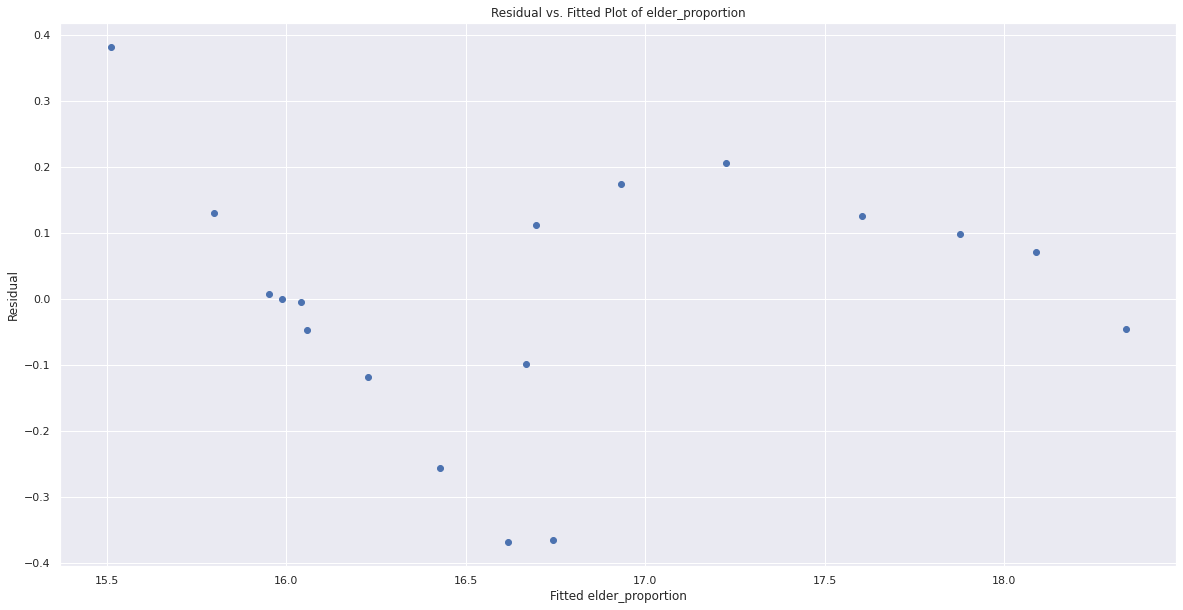

In [30]:
# plot 
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted elder_proportion')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of elder_proportion')
plt.show()

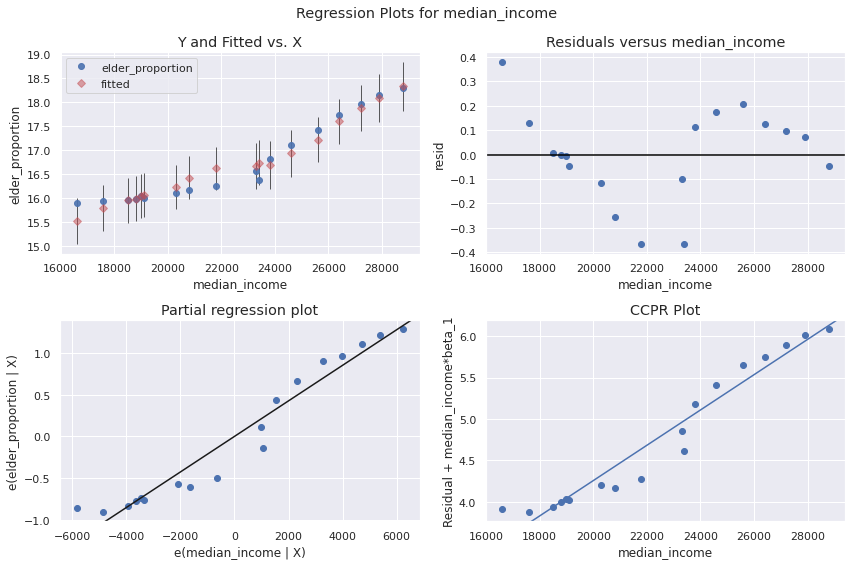

In [33]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'median_income', fig=fig)
plt.savefig('Regression_median_income.png', dpi = 600)

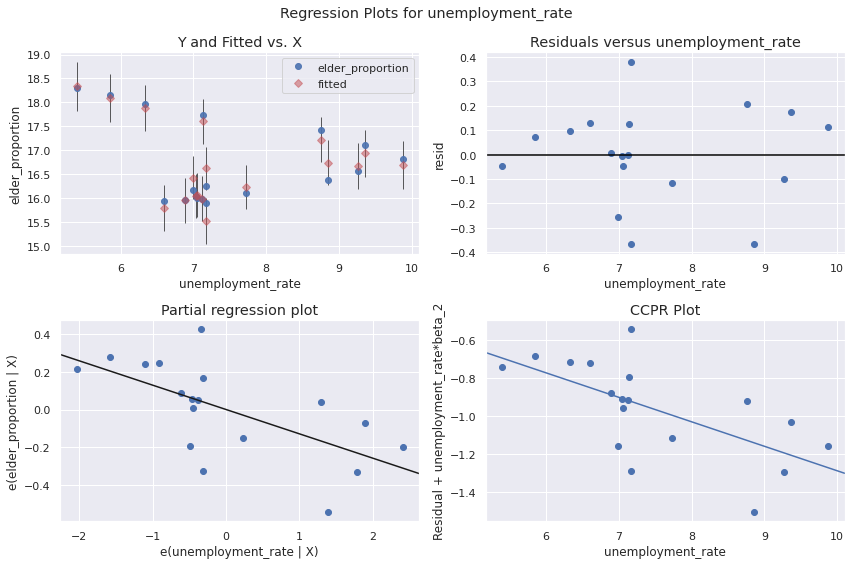

In [34]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'unemployment_rate', fig=fig)
plt.savefig('Regression_unemployment_rate.png', dpi = 600)